<a href="https://colab.research.google.com/github/Dantheman3345/IS4487_Labs/blob/main/lab4_social_media_eda_finished_Daniel_M.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 4

## Outline

Repeat exercises from Lab 2, but with the *X SuperBowl* social media dataset
- Loading installed packages
- Inspect data
- Explore plot types

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab4_social_media_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sl

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the X SuperBowl dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe
- Make sure you watch for line breaks and emojis that might cause problems with the data import

In [3]:

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/gdrive/MyDrive/Colab Notebooks/x_superbowl.csv')


Mounted at /content/gdrive


In [4]:
print(df.columns)

Index(['Unnamed: 0', '_id', 'created_at', 'id', 'id_str', 'text',
       'display_text_range', 'source', 'truncated', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'is_quote_status',
       'quote_count', 'reply_count', 'retweet_count', 'favorite_count',
       'entities', 'favorited', 'retweeted', 'filter_level', 'lang',
       'matching_rules', 'retweeted_status', 'extended_tweet',
       'extended_entities', 'possibly_sensitive', 'quoted_status_id',
       'quoted_status_id_str', 'quoted_status', 'quoted_status_permalink',
       'scopes'],
      dtype='object')


In [5]:
column_data_types = df.dtypes

for column_name, data_type in column_data_types.items():
    print(f"{column_name}: {data_type}")

Unnamed: 0: int64
_id: object
created_at: object
id: float64
id_str: int64
text: object
display_text_range: object
source: object
truncated: bool
in_reply_to_status_id: float64
in_reply_to_status_id_str: float64
in_reply_to_user_id: float64
in_reply_to_user_id_str: float64
in_reply_to_screen_name: object
user: object
geo: object
coordinates: object
place: object
contributors: float64
is_quote_status: bool
quote_count: int64
reply_count: int64
retweet_count: int64
favorite_count: int64
entities: object
favorited: bool
retweeted: bool
filter_level: object
lang: object
matching_rules: object
retweeted_status: object
extended_tweet: object
extended_entities: object
possibly_sensitive: object
quoted_status_id: float64
quoted_status_id_str: float64
quoted_status: object
quoted_status_permalink: object
scopes: object


## Prepare Data

➡️ Assignment Tasks
- Convert any numbers, such as user_mentioned, from strings into numbers
- Reduce the variables in your dataframe to only those that have useful data
- Optional: Locate outliers in any of the variables.   Filter them out if they are mistakes; keep them if they are exceptional cases.

In [6]:
columns_to_drop = ['display_text_range', 'in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str','geo','coordinates','place','contributors','quoted_status_id','quoted_status_id_str','quoted_status','quoted_status_permalink','scopes']

In [7]:
df['user'] = pd.to_numeric(df['user'], errors='coerce')

In [8]:
print(df)

      Unnamed: 0                       _id                      created_at  \
0              0  6020fc7e9e1aa8e3e7ad0832  Mon Feb 08 04:29:58 +0000 2021   
1              1  6020fc7e9e1aa8e3e7ad0833  Mon Feb 08 04:29:55 +0000 2021   
2              2  6020fc7e9e1aa8e3e7ad0834  Mon Feb 08 04:29:48 +0000 2021   
3              3  6020fc7e9e1aa8e3e7ad0835  Mon Feb 08 04:29:43 +0000 2021   
4              4  6020fc7e9e1aa8e3e7ad0836  Mon Feb 08 04:29:42 +0000 2021   
...          ...                       ...                             ...   
9751           3  6020fbb89e1aa8e3e7ac0a78  Mon Feb 08 02:01:58 +0000 2021   
9752           4  6020fbb89e1aa8e3e7ac0a79  Mon Feb 08 01:00:24 +0000 2021   
9753           5  6020fbb89e1aa8e3e7ac0a7a  Sun Feb 07 23:44:20 +0000 2021   
9754           6  6020fbb89e1aa8e3e7ac0a7b  Sun Feb 07 23:33:40 +0000 2021   
9755           7  6020fbb89e1aa8e3e7ac0a7c  Sun Feb 07 23:32:32 +0000 2021   

                id               id_str  \
0     1.358630e+18  

In [9]:
df = df.drop(columns=columns_to_drop, errors='ignore')

## Summarize Data

➡️ Assignment Tasks
- Create at least two charts to summarize and visualize the data
- Examples include: Number of posts per device; top 10 posts with highest engagement

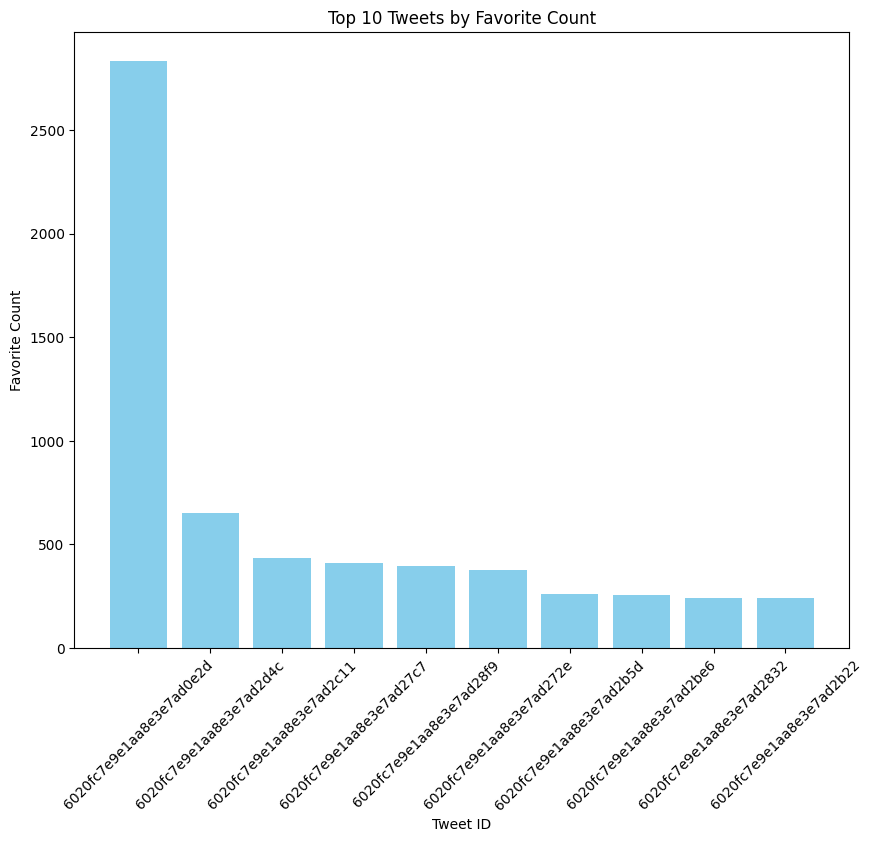

In [10]:
#chart 1 # Check if both '_id' and 'favorite_count' columns exist
# Sort the DataFrame by 'favorite_count' in descending order
df_sorted = df.sort_values(by='favorite_count', ascending=False)

# Select the top 10 items
df_top_10 = df_sorted.head(10)

# Plotting
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
plt.bar(df_top_10['_id'].astype(str), df_top_10['favorite_count'], color='skyblue')
plt.xlabel('Tweet ID')
plt.ylabel('Favorite Count')
plt.title('Top 10 Tweets by Favorite Count')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

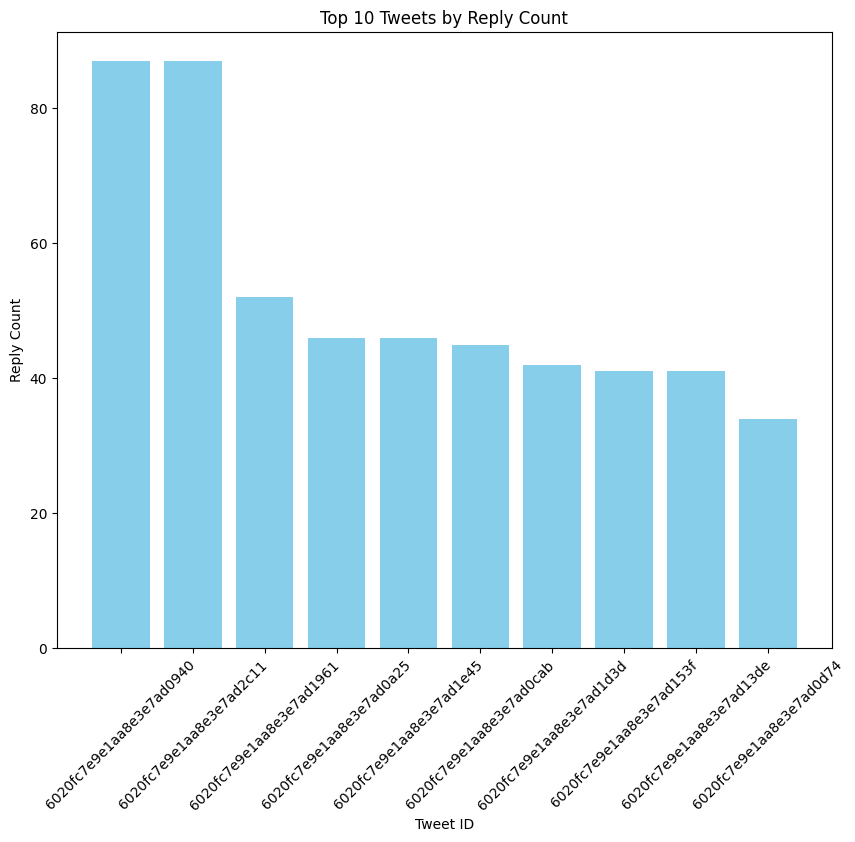

In [11]:
#chart 2
# Sort the DataFrame by 'reply_count' in descending order
df_sorted = df.sort_values(by='reply_count', ascending=False)

# Select the top 10 items
df_top_10 = df_sorted.head(10)

# Plotting
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
plt.bar(df_top_10['_id'].astype(str), df_top_10['reply_count'], color='skyblue')
plt.xlabel('Tweet ID')
plt.ylabel('Reply Count')
plt.title('Top 10 Tweets by Reply Count')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()